In [ ]:
path = "/content/drive/MyDrive/5DEEP/Fashion MNIST/data/"

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dropout, RandomFlip, RandomRotation, RandomZoom, RandomTranslation, Resizing
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
X_train = pd.read_csv(f"{path}/fashion-mnist_train.csv")
X_test = pd.read_csv(f"{path}/fashion-mnist_test.csv")

In [ ]:
X_train, X_val = train_test_split(X_train, test_size=1/6)

In [ ]:
target = "label"

In [ ]:
y_train = X_train[target]
y_val = X_val[target]
y_test = X_test[target]

In [ ]:
X_train = X_train.drop(target, axis=1)

In [ ]:
X_val = X_val.drop(target, axis=1)
X_test = X_test.drop(target, axis=1)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(50000, 784)
(10000, 784)
(10000, 784)
(50000,)
(10000,)
(10000,)


In [ ]:
image_w = 28
image_h = 28

In [ ]:
labels = {
    0 : "T-shirt/Top",
    1 : "Trouser",
    2 : "Pullover",
    3 : "Dress",
    4 : "Coat",
    5 : "Sandal",
    6 : "Shirt",
    7 : "Sneaker",
    8 : "Bag",
    9 : "Ankle boot"
}

In [ ]:
X_train_image = X_train.to_numpy().reshape(X_train.shape[0], image_w, image_h)

In [ ]:
X_train_image.shape

(50000, 28, 28)

Sandal


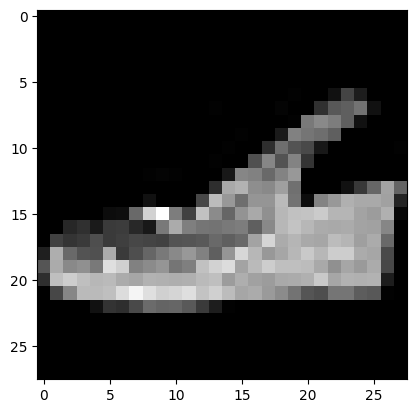

Sandal


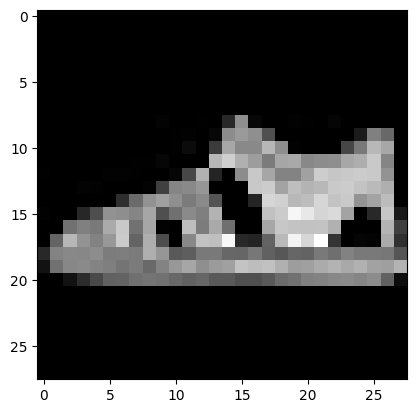

Coat


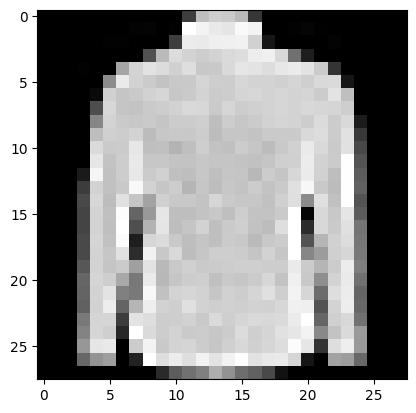

Pullover


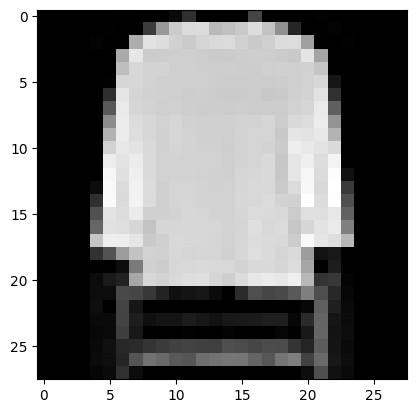

Trouser


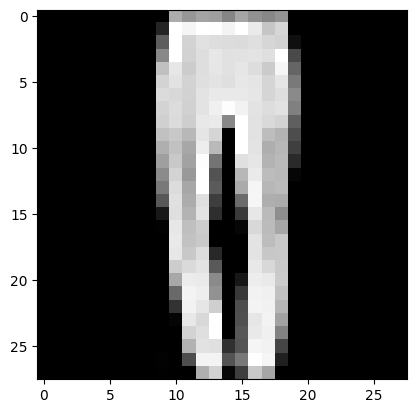

Coat


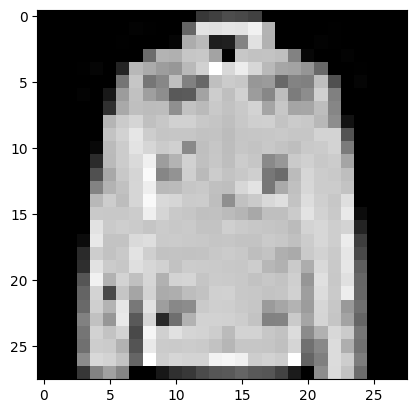

Sandal


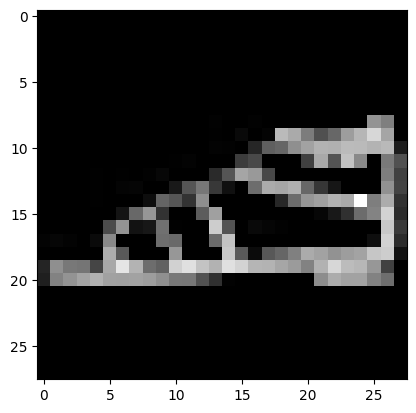

Trouser


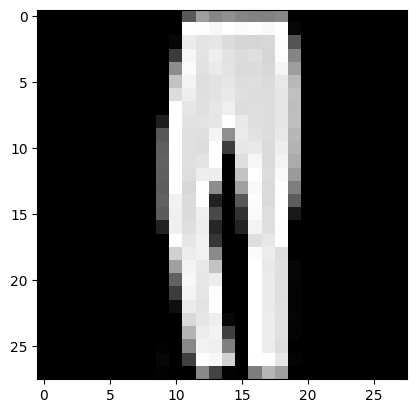

T-shirt/Top


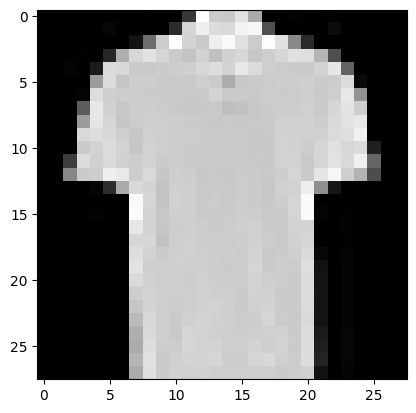

T-shirt/Top


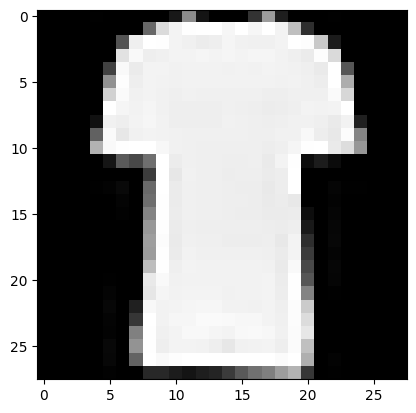

In [ ]:
plt.gray()
for i in range(10):
  print(labels[y_train.iloc[i]])
  plt.imshow(X_train_image[i])
  plt.show()

## Prétraitement des données

In [ ]:
X_train_norm = X_train/255
X_val_norm = X_val/255
X_test_norm = X_test/255

In [ ]:
y_train_cat = to_categorical(y_train, num_classes=10)
y_val_cat = to_categorical(y_val, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [ ]:
print(y_train_cat.shape)
print(y_val_cat.shape)
print(y_test_cat.shape)

(50000, 10)
(10000, 10)
(10000, 10)


## Création d'un réseau dense

In [ ]:
input_dim = X_train.shape[1]
output_dim = y_train_cat.shape[1]

In [ ]:
print(input_dim)
print(output_dim)

784
10


In [ ]:
def create_dense_model():
  model = Sequential()

  model.add(Input(shape=(input_dim,)))
  model.add(Dense(100, activation="relu"))
  model.add(Dense(20, activation="relu"))
  model.add(Dense(20, activation="relu"))
  model.add(Dense(20, activation="relu"))
  model.add(Dense(20, activation="relu"))
  model.add(Dense(20, activation="relu"))
  model.add(Dense(20, activation="relu"))

  model.add(Dense(output_dim, activation="softmax"))

  model.compile(optimizer=Adam(learning_rate=0.0001), loss = "categorical_crossentropy", metrics=["categorical_accuracy"])

  model.summary()

  return model



In [ ]:
modele_dense = create_dense_model()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 20)                  │           2,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,830 (323.55 KB)

 Trainable params: 82,830 (323.55 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
nb_epochs = 100

In [ ]:
history_dense = modele_dense.fit(
    X_train_norm,
    y_train_cat,
    validation_data = (X_val_norm, y_val_cat),
    epochs=nb_epochs,
    callbacks = [EarlyStopping(patience=10)]
)

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - categorical_accuracy: 0.3598 - loss: 1.7030 - val_categorical_accuracy: 0.7695 - val_loss: 0.6441
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - categorical_accuracy: 0.7927 - loss: 0.5862 - val_categorical_accuracy: 0.8146 - val_loss: 0.5259
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - categorical_accuracy: 0.8212 - loss: 0.5036 - val_categorical_accuracy: 0.8364 - val_loss: 0.4808
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - categorical_accuracy: 0.8396 - loss: 0.4619 - val_categorical_accuracy: 0.8450 - val_loss: 0.4527
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - categorical_accuracy: 0.8512 - loss: 0.4294 - val_categorical_accuracy: 0.8451 - val_loss: 0.4505
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - categorical_accuracy: 0.8559 - loss: 0.4175 - val_categorical_accuracy: 0.8553 - val_loss: 0.4215
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - categoric

## Évaluation du modèle
On crée un dictionnaire performance qui va stocker les scores des différents modèles pour pouvoir les comparer.

In [ ]:
def plot_history(history):
    fig, axes = plt.subplots(1,2, figsize=(15,6))
    hist_data = history.history
    hist_data["epochs"] = list(range(1, len(history.history["loss"])+1))

    hist_data = pd.DataFrame(hist_data)
    sns.lineplot(data=hist_data, x="epochs", y="loss", ax=axes[0], color = "blue")
    sns.lineplot(data=hist_data, x="epochs", y="val_loss", ax=axes[0], color = "orange")

    sns.lineplot(data=hist_data, x="epochs", y="categorical_accuracy", ax=axes[1], color = "blue")
    sns.lineplot(data=hist_data, x="epochs", y="val_categorical_accuracy", ax=axes[1], color = "orange")

In [ ]:
performances = {}

In [ ]:
def evaluate_model(model, name, X_test, y_test, history):
  loss, categorical_accuracy = model.evaluate(X_test, y_test)
  performances[name] = {"Loss" : loss, "Accuracy": categorical_accuracy}
  plot_history(history)
  print(performances)

In [ ]:
evaluate_model(
    model=modele_dense,
    name="Réseau dense",
    X_test=X_test_norm,
    y_test=y_test_cat,
    history=history_dense
)

NameError: name 'modele_dense' is not defined

In [ ]:
modele_dense.save("modele_dense.keras")

In [ ]:
# modele_dense = load_model("modele_dense.keras")

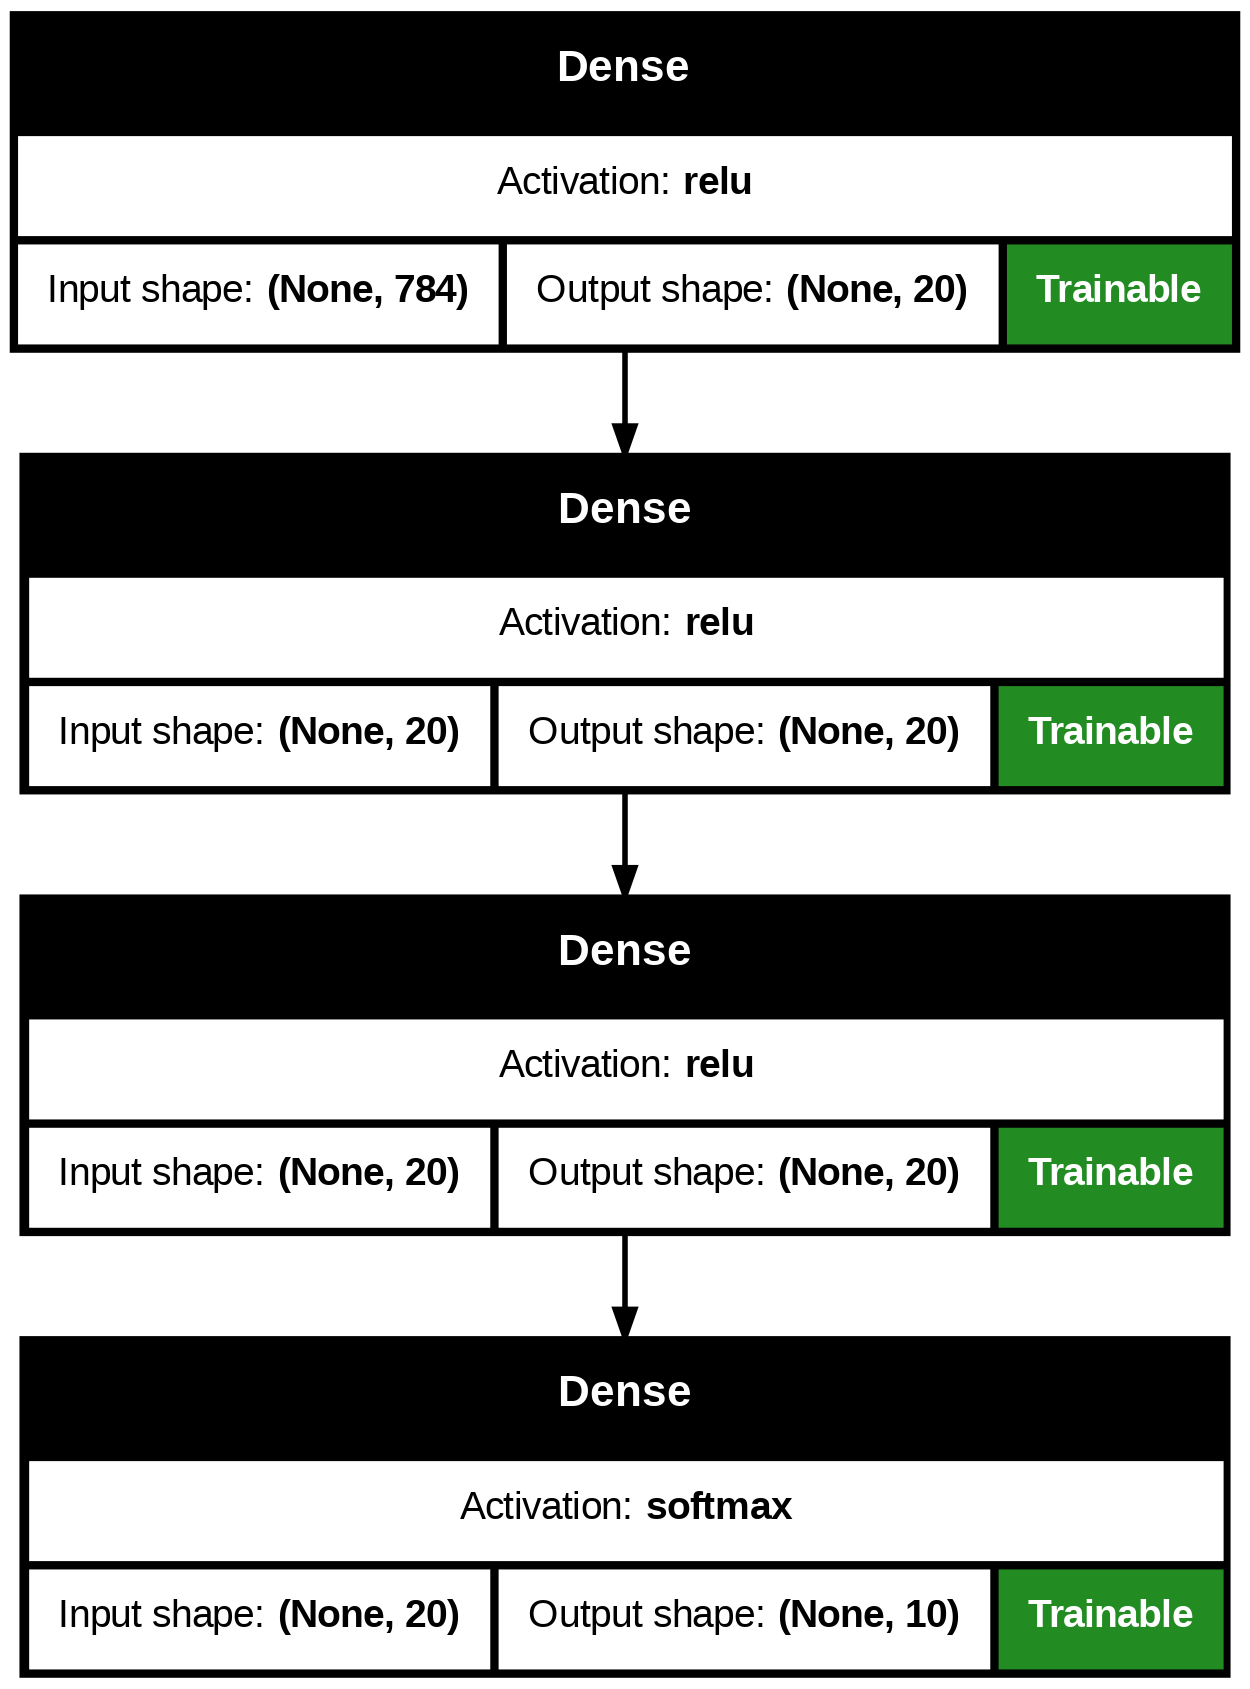

In [ ]:
plot_model(
    modele_dense,
    show_shapes=True,
    show_layer_activations=True,
    show_trainable=True,
)

## Observation des prédictions

In [ ]:
y_pred = modele_dense.predict(X_test_norm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


Classe prédite: T-shirt/Top
Classe vraie  : T-shirt/Top


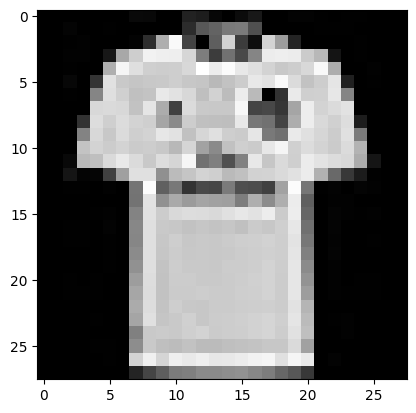

Classe prédite: Trouser
Classe vraie  : Trouser


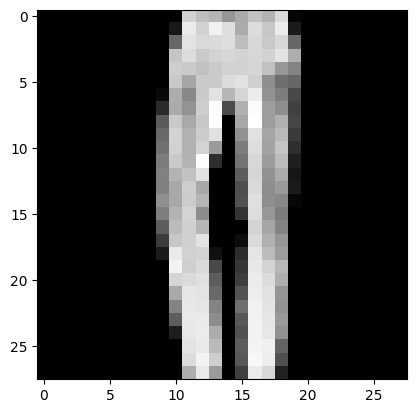

Classe prédite: Pullover
Classe vraie  : Pullover


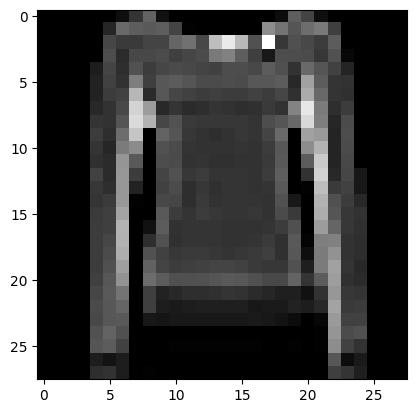

Classe prédite: Shirt
Classe vraie  : Pullover


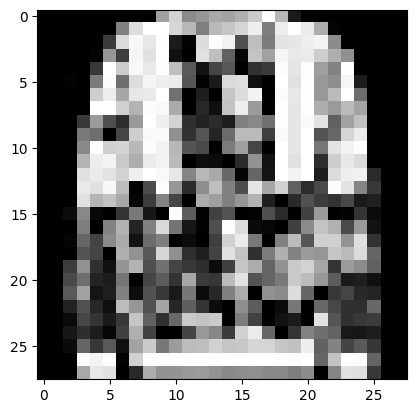

Classe prédite: Dress
Classe vraie  : Dress


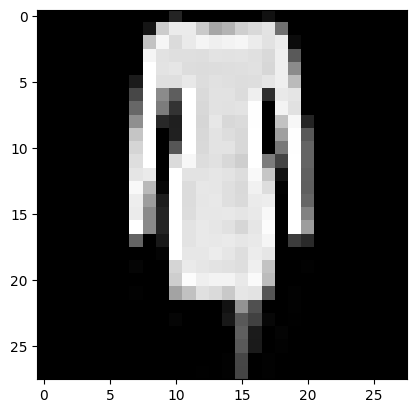

Classe prédite: Shirt
Classe vraie  : Pullover


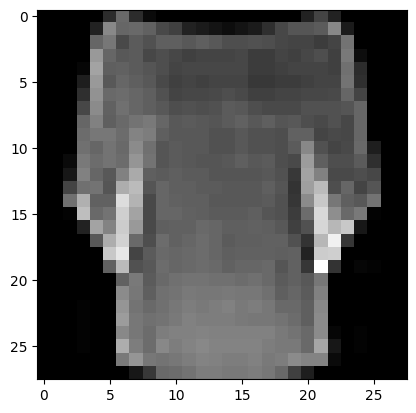

Classe prédite: Bag
Classe vraie  : Bag


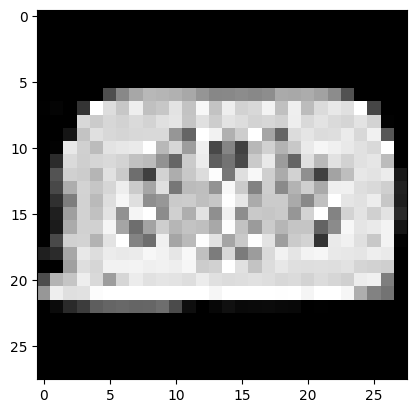

Classe prédite: Pullover
Classe vraie  : Shirt


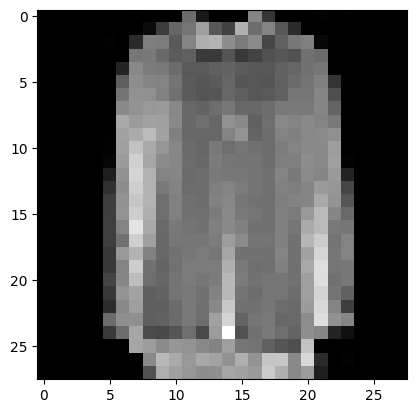

Classe prédite: Sandal
Classe vraie  : Sandal


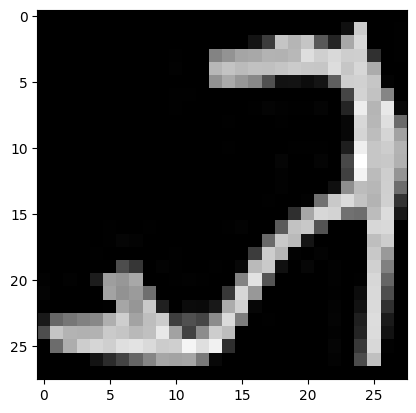

Classe prédite: T-shirt/Top
Classe vraie  : T-shirt/Top


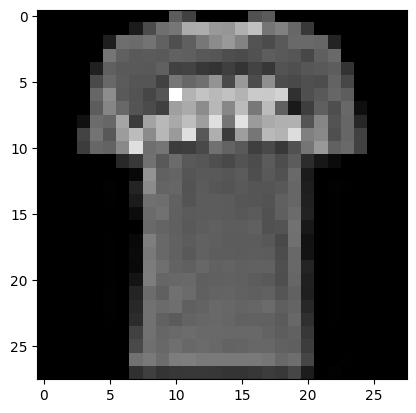

In [ ]:
for i in range(10):
  print(f"Classe prédite: {labels[np.argmax(y_pred[i])]}")
  print(f"Classe vraie  : {labels[np.argmax(y_test_cat[i])]}")
  plt.imshow(X_test_norm.iloc[i].to_numpy().reshape(image_w, image_h))
  plt.show()

## Création du modèle de convolution

In [ ]:
X_train_image = X_train.to_numpy().reshape(X_train.shape[0], image_w, image_h, 1)
X_val_image = X_val.to_numpy().reshape(X_val.shape[0], image_w, image_h, 1)
X_test_image = X_test.to_numpy().reshape(X_test.shape[0], image_w, image_h, 1)

In [ ]:
X_train_image.shape

(50000, 28, 28, 1)

In [ ]:
input_shape = X_train_image.shape[1:]
output_dim = y_train_cat.shape[1]

In [ ]:
print(input_shape)
print(output_dim)

(28, 28, 1)
10


In [ ]:
X_train_image_norm = X_train_image/255
X_val_image_norm = X_val_image/255
X_test_image_norm = X_test_image/255

In [ ]:
def create_cnn_model():
  model = Sequential()

  model.add(Input(shape=input_shape))

  model.add(Conv2D(8, kernel_size=(3,3), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(16, kernel_size=(3,3), activation="relu"))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(16, kernel_size=(3,3), activation="relu"))


  model.add(Flatten())

  model.add(Dense(16, activation="relu"))
  model.add(Dense(16, activation="relu"))

  model.add(Dense(output_dim, activation="softmax"))

  model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["categorical_accuracy"])

  model.summary()

  return model


In [ ]:
model_cnn = create_cnn_model()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 16)            │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 144)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,330 (24.73 KB)

 Trainable params: 6,330 (24.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
nb_epochs = 50

In [ ]:
history_cnn = model_cnn.fit(
    X_train_image_norm,
    y_train_cat,
    epochs=nb_epochs,
    validation_data=(X_val_image_norm, y_val_cat),
    callbacks=[EarlyStopping(patience=3)]
)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - categorical_accuracy: 0.5911 - loss: 1.0768 - val_categorical_accuracy: 0.7987 - val_loss: 0.5347
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 20ms/step - categorical_accuracy: 0.8048 - loss: 0.5336 - val_categorical_accuracy: 0.8387 - val_loss: 0.4538
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 18ms/step - categorical_accuracy: 0.8387 - loss: 0.4484 - val_categorical_accuracy: 0.8530 - val_loss: 0.4070
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 21ms/step - categorical_accuracy: 0.8555 - loss: 0.4066 - val_categorical_accuracy: 0.8591 - val_loss: 0.3868
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - categorical_accuracy: 0.8635 - loss: 0.3822 - val_categorical_accuracy: 0.8599 - val_loss: 0.3909
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - categorical_accuracy: 0.8654 - loss: 0.3660 - val_categorical_accuracy: 0.8628 - val_loss: 0.3826
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - catego

## Augmentation de données à partir d'un dossier

In [ ]:
# Création et stockage d'une image (optionnel)
from PIL import Image
image = Image.fromarray(X_train_image[0].reshape(image_w, image_h).astype(np.uint8))
image.save(f"{path}/sandale.png")

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array

In [ ]:
image_generator = ImageDataGenerator(
    rotation_range = 10,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.1,
    horizontal_flip = True,
)

In [ ]:
image = load_img(f"{path}/sandale.png", color_mode="grayscale")

In [ ]:
image = img_to_array(image)

In [ ]:
image = image.reshape((1,) + image.shape)

In [ ]:
image.shape

(1, 28, 28, 1)

In [ ]:
i = 0
nb_images = 50
for batch in image_generator.flow(
    image,
    batch_size = 1, # nombre d'images générées à chaque itération
    save_to_dir = f"{path}/augmentation/",
    save_prefix = "aug",
    save_format = "png"
):
  i += 1
  if i > nb_images:
    break

## Création d'un modèle de convlution avec augmentation des données

In [ ]:
input_shape

(28, 28, 1)

In [ ]:
def create_cnn_model_augmentation():
  model = Sequential()

  # Couche d'entrée
  model.add(Input(shape=input_shape))

  # Couches servant à modifier l'image par transformations géométriques
  model.add(RandomFlip("horizontal"))
  model.add(RandomRotation(0.05))
  model.add(RandomZoom(0.2))
  model.add(RandomTranslation(height_factor=0.1, width_factor=0.1))

  # Couches de convolution
  model.add(Conv2D(16, kernel_size=(2,2), activation="relu"))
  model.add(AveragePooling2D(pool_size=(2,2)))
  model.add(Conv2D(16, kernel_size=(2,2), activation="relu"))
  model.add(AveragePooling2D(pool_size=(2,2)))

  # Applatissement des images convoluées
  model.add(Flatten())

  # Couches denses servant à la classification
  model.add(Dense(16, activation = "relu"))
  model.add(Dense(output_dim, activation = "softmax"))

  model.compile(optimizer = Adam(), loss="categorical_crossentropy", metrics=["categorical_accuracy"])

  model.summary()
  return model

In [ ]:
model_cnn_augmentation = create_cnn_model_augmentation()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ random_flip_1 (RandomFlip)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_rotation_1 (RandomRotation)   │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_zoom_1 (RandomZoom)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ random_translation                   │ (None, 28, 28, 1)           │               0 │
│ (RandomTranslation)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 27, 27, 16)          │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 16)          │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 6, 6, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │           9,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,522 (41.10 KB)

 Trainable params: 10,522 (41.10 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
nb_epochs = 2

In [ ]:
history_cnn_aug = model_cnn_augmentation.fit(
    X_train_image_norm,
    y_train_cat,
    epochs=nb_epochs,
    validation_data=(X_val_image_norm, y_val_cat),
    callbacks=[EarlyStopping(patience=3)]
)

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - categorical_accuracy: 0.6732 - loss: 0.8799 - val_categorical_accuracy: 0.7581 - val_loss: 0.6182
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - categorical_accuracy: 0.7129 - loss: 0.7532 - val_categorical_accuracy: 0.7693 - val_loss: 0.5916


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - categorical_accuracy: 0.7687 - loss: 0.5894
{'CNN augmenté': {'Loss': 0.5882073044776917, 'Accuracy': 0.7713000178337097}}


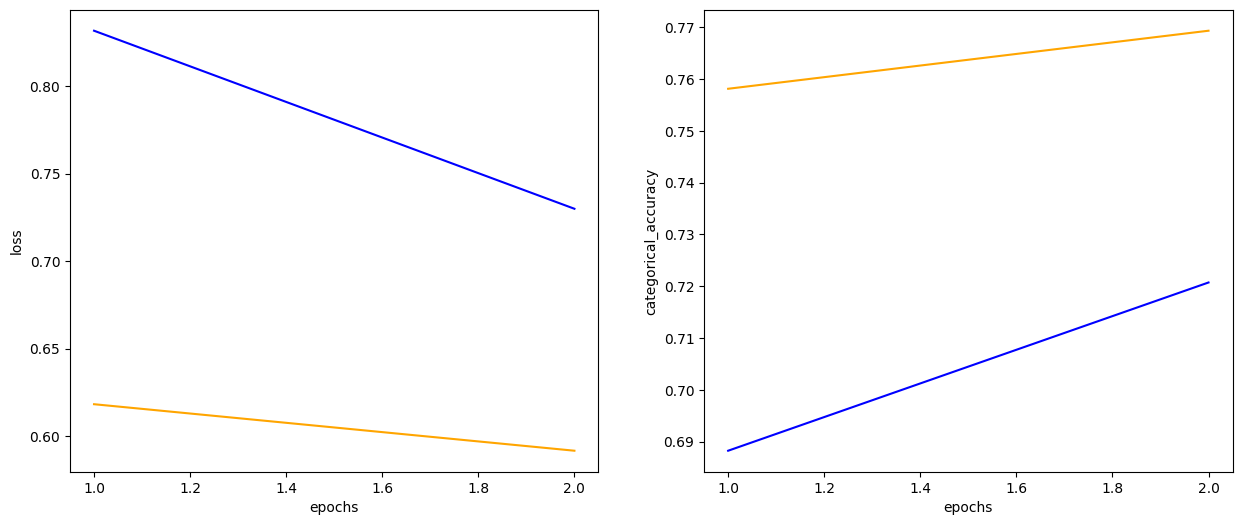

In [ ]:
evaluate_model(
    model=model_cnn_augmentation,
    name = "CNN augmenté",
    X_test = X_test_image_norm,
    y_test = y_test_cat,
    history = history_cnn_aug
)

## Transfer Learning

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

VGG16 ne prend que des images RGB: on transforme nos données pour passer de (50000, 28, 28 1) à (50000, 28, 28 3) en répétant la même information sur les 3 cannaux créés

In [ ]:
X_train_image_vgg16 = np.repeat(X_train_image, 3, axis=-1)
X_val_image_vgg16 = np.repeat(X_val_image, 3, axis=-1)
X_test_image_vgg16 = np.repeat(X_test_image, 3, axis=-1)

In [ ]:
input_shape = X_train_image_vgg16.shape[1:]

In [ ]:
input_shape

(28, 28, 3)

In [ ]:
def create_model_from_vgg16():

  model = Sequential()

  model.add(Input(shape=input_shape))
  model.add(Resizing(32,32))

  conv = VGG16(weights="imagenet", include_top=False, input_shape=(32,32,3))

  for layer in conv.layers:
    layer.trainable = False

  model.add(conv)

  model.add(Flatten())

  model.add(Dense(16, activation="relu"))
  model.add(Dense(output_dim, activation="softmax"))

  model.compile(optimizer=Adam(), loss = "categorical_crossentropy", metrics = ["categorical_accuracy"])

  model.summary()


  return model




In [ ]:
model_vgg16 = create_model_from_vgg16()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing_2 (Resizing)                │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │           8,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,723,066 (56.16 MB)

 Trainable params: 8,378 (32.73 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

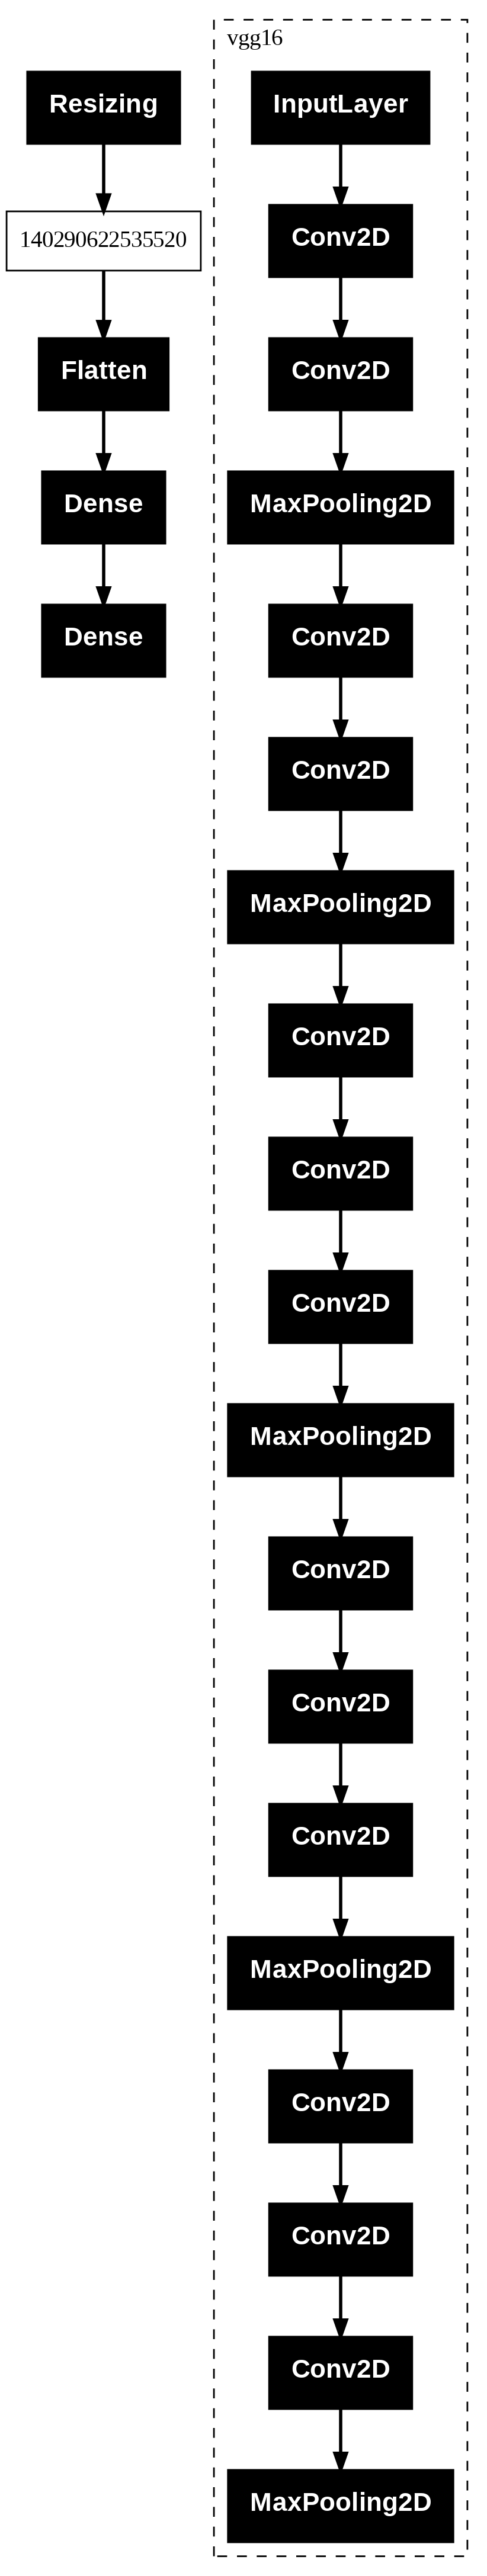

In [ ]:
plot_model(model_vgg16, expand_nested=True)

In [ ]:
history_vgg16 = model_vgg16.fit(
    X_train_image_vgg16,
    y_train_cat,
    epochs=nb_epochs,
    validation_data=(X_val_image_vgg16, y_val_cat),
    callbacks=[EarlyStopping(patience=3)]
)

Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 811s 518ms/step - categorical_accuracy: 0.5599 - loss: 1.7220 - val_categorical_accuracy: 0.7707 - val_loss: 0.6227
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 855s 513ms/step - categorical_accuracy: 0.7866 - loss: 0.5805 - val_categorical_accuracy: 0.8024 - val_loss: 0.5310
